In [1]:
# Import data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

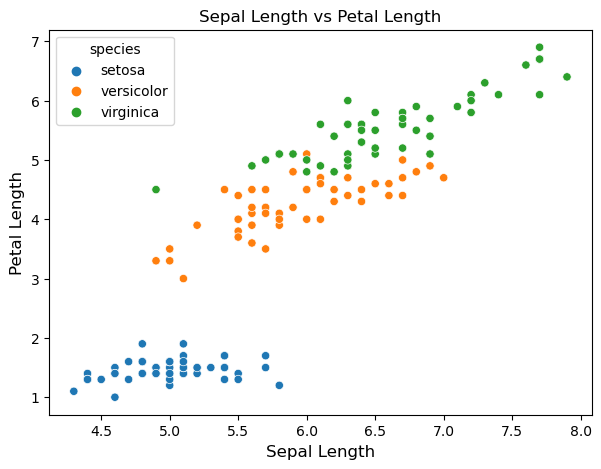

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length',
                hue='species')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Petal Length', fontsize=12)
plt.title('Sepal Length vs Petal Length')
plt.show()

In [22]:
target = []
for species in iris['species']:
    if species == 'setosa':
        target.append(0)
    elif species == 'vesicolor':
        target.append(1)
    else:
        target.append(2)

iris['target'] = target
data = iris.drop('species', axis=1)

In [26]:
data.shape

X = data.iloc[:, :4]
y = data.iloc[:, -1]

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    stratify=y, random_state=seed)

In [33]:
model = SVC()

param_grid = {'C':[1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    verbose=3,
                    scoring='accuracy')

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=3)

In [35]:
best_model = grid.best_estimator_
best_parameters = grid.best_params_

In [36]:
y_pred = best_model.predict(X_test)

In [44]:
print('The optimal parameters for this model is: ',best_parameters)
print('The accuracy of the model is: ', accuracy_score(y_test, y_pred))
print('The confusion matrix of the model \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The optimal parameters for this model is:  {'C': 1, 'gamma': 1}
The accuracy of the model is:  1.0
The confusion matrix of the model 
 [[17  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        33

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

